<a href="https://colab.research.google.com/github/RachidaMellouli/End-of-study-project/blob/main/End_of_study_project(deep_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

# **Import Data**

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
import numpy as np
import pandas as pd 
import os
import random
from tqdm import tqdm
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from scipy.stats import mannwhitneyu
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
y_train_test = []
init_notebook_mode(connected=True) ## plotly init
seed = 123
random.seed = seed

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
!python --version

Python 3.7.13


In [ ]:
filenames_listFN = os.listdir('./drive/MyDrive/EEGData/FN/') ## list of file names in the directory
filenames_listFP = os.listdir('./drive/MyDrive/EEGData/FP/') 
filenames_listFU = os.listdir('./drive/MyDrive/EEGData/FU/') 
filenames_listNN = os.listdir('./drive/MyDrive/EEGData/NN/') 
filenames_listNP = os.listdir('./drive/MyDrive/EEGData/NP/') 
filenames_listNU = os.listdir('./drive/MyDrive/EEGData/NU/') 
EEG_data = [] ## create an empty df that will hold data from each file
y_train_test = []


In [ ]:
for file_name in tqdm(filenames_listFN):
    temp_df = pd.read_csv('./drive/MyDrive/EEGData/FN/' + file_name) ## read from the file to df
    EEG_data.append(temp_df) ## add the file data to the main df
    y_train_test.append([1,0])

100%|██████████| 4336/4336 [03:31<00:00, 20.48it/s]


In [ ]:
for file_name in tqdm(filenames_listFP):
    temp_df = pd.read_csv('./drive/MyDrive/EEGData/FP/' + file_name) ## read from the file to df
    EEG_data.append(temp_df) ## add the file data to the main df
    y_train_test.append([1,0]) 

 95%|█████████▍| 4146/4371 [51:26<02:54,  1.29it/s]

In [ ]:
for file_name in tqdm(filenames_listFU):
    temp_df = pd.read_csv('./drive/MyDrive/EEGData/FU/' + file_name) ## read from the file to df
    EEG_data.append(temp_df) ## add the file data to the main df
    y_train_test.append([1,0]) 

100%|██████████| 4239/4239 [52:46<00:00,  1.34it/s]


In [ ]:
for file_name in tqdm(filenames_listNN):
    temp_df = pd.read_csv('./drive/MyDrive/EEGData/NN/' + file_name) ## read from the file to df
    EEG_data.append(temp_df) ## add the file data to the main df
    y_train_test.append([0,1])

100%|██████████| 1238/1238 [15:22<00:00,  1.34it/s]


In [ ]:
for file_name in tqdm(filenames_listNP):
    temp_df = pd.read_csv('./drive/MyDrive/EEGData/NP/' + file_name) ## read from the file to df
    EEG_data.append(temp_df) ## add the file data to the main df
    y_train_test.append([0,1])

100%|██████████| 1264/1264 [15:38<00:00,  1.35it/s]


In [ ]:
for file_name in tqdm(filenames_listNU):
    temp_df = pd.read_csv('./drive/MyDrive/EEGData/NU/' + file_name) ## read from the file to df
    EEG_data.append(temp_df) ## add the file data to the main df
    y_train_test.append([0,1])

100%|██████████| 1218/1218 [14:58<00:00,  1.36it/s]


In [ ]:
path="./drive/MyDrive/EEGData"
class_names=os.listdir(path)
print(class_names)

['FN', 'FP', 'FU', 'NU', 'NN', 'NP']


In [ ]:
y_train_test = np.array(y_train_test)
EEG_data = np.array(EEG_data)

In [ ]:
print(y_train_test)

In [ ]:
print(y_train_test.shape)
print(EEG_data.shape)

# **Preprocessing Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train_val, x_test, y_train_val, y_test  = train_test_split(EEG_data, y_train_test, test_size=0.10, random_state=42)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.09, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(13649, 63, 384)
(1667, 63, 384)
(1350, 63, 384)


[1 0]


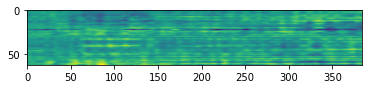

In [ ]:
plt.imshow(x_train[1])
print(y_train[1])

[1 0]


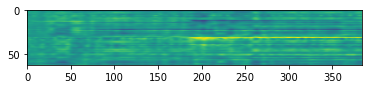

In [ ]:
plt.imshow(x_train[0])
print(y_train[0])

# **Testing Models**

## **VGG16 Model**

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
modelVGG16 = Sequential()
modelVGG16.add(Conv2D(input_shape=(63,384,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
modelVGG16.add(Flatten())
modelVGG16.add(Dense(units = 1000, activation ='relu'))
modelVGG16.add(Dense(units = 128, activation ='relu'))
modelVGG16.add(Dropout(0.5))
modelVGG16.add(Dense(units=2, activation="softmax"))


NameError: ignored

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(modelVGG16, to_file='modelVGG16.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
modelVGG16.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')
hist = modelVGG16.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=15,callbacks=[checkpoint,early])

Epoch 1/15
427/427 [==============================] - ETA: 0s - loss: 0.6400 - accuracy: 0.7738
Epoch 1: val_accuracy improved from -inf to 0.76444, saving model to vgg16_1.h5
427/427 [==============================] - 1184s 3s/step - loss: 0.6400 - accuracy: 0.7738 - val_loss: 0.5471 - val_accuracy: 0.7644
Epoch 2/15
427/427 [==============================] - ETA: 0s - loss: 0.5348 - accuracy: 0.7758
Epoch 2: val_accuracy did not improve from 0.76444
427/427 [==============================] - 1182s 3s/step - loss: 0.5348 - accuracy: 0.7758 - val_loss: 0.5460 - val_accuracy: 0.7644
Epoch 3/15
427/427 [==============================] - ETA: 0s - loss: 0.5344 - accuracy: 0.7758
Epoch 3: val_accuracy did not improve from 0.76444
427/427 [==============================] - 1189s 3s/step - loss: 0.5344 - accuracy: 0.7758 - val_loss: 0.5462 - val_accuracy: 0.7644
Epoch 4/15
427/427 [==============================] - ETA: 0s - loss: 0.5338 - accuracy: 0.7758
Epoch 4: val_accuracy did not impro

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
ypred = modelVGG16.predict(x_test)
print ("VGG 16 Model")

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))
print(classification_report(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))


VGG 16 Model
[[1325    0]
 [ 342    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      1325
           1       0.00      0.00      0.00       342

    accuracy                           0.79      1667
   macro avg       0.40      0.50      0.44      1667
weighted avg       0.63      0.79      0.70      1667



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



VGG 16 Model


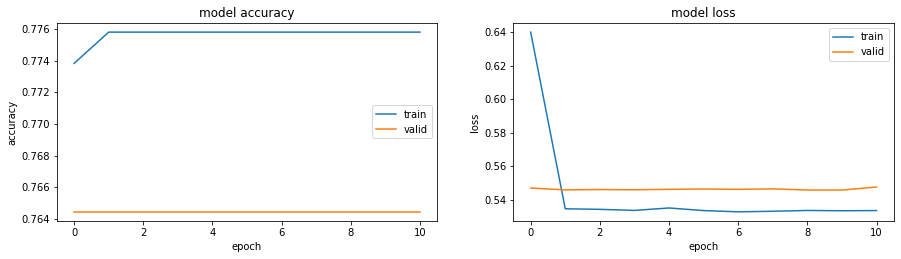

In [ ]:
print ("VGG 16 Model")
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(hist.history['accuracy'])  
plt.plot(hist.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(hist.history['loss'])  
plt.plot(hist.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
modelVGG16.save('my_modelVGG16.h5')

## **DenseNet Model**

In [ ]:
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from tensorflow.keras.optimizers import Adam



def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x


def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters


def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters


def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(63,384,1))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)

In [ ]:
dense_block_size = 3
layers_in_block = 4

growth_rate = 12
classes = 2
model_Dense = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
model_Dense.summary()


# training
batch_size = 32
epochs = 15
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model_Dense.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
hist2=model_Dense.fit(x_train,y_train, epochs=epochs, batch_size=batch_size, shuffle=True,validation_data=(x_val, y_val))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 63, 384, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 63, 384, 24)  216         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 63, 384, 24)  0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 192, 24)  0           ['activation[0][0]']         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/15
427/427 [==============================] - 370s 860ms/step - loss: 0.5561 - accuracy: 0.7616 - val_loss: 0.5476 - val_accuracy: 0.7644
Epoch 2/15
427/427 [==============================] - 366s 857ms/step - loss: 0.5220 - accuracy: 0.7762 - val_loss: 0.5324 - val_accuracy: 0.7659
Epoch 3/15
427/427 [==============================] - 369s 865ms/step - loss: 0.5159 - accuracy: 0.7770 - val_loss: 0.5298 - val_accuracy: 0.7689
Epoch 4/15
427/427 [==============================] - 367s 860ms/step - loss: 0.5121 - accuracy: 0.7783 - val_loss: 0.5285 - val_accuracy: 0.7667
Epoch 5/15
427/427 [==============================] - 373s 873ms/step - loss: 0.5070 - accuracy: 0.7791 - val_loss: 0.6144 - val_accuracy: 0.6778
Epoch 6/15
427/427 [==============================] - 370s 867ms/step - loss: 0.5018 - accuracy: 0.7798 - val_loss: 0.6277 - val_accuracy: 0.6644
Epoch 7/15
427/427 [==============================] - 369s 865ms/step - loss: 0.4990 - accuracy: 0.7808 - val_loss: 0.5518 -

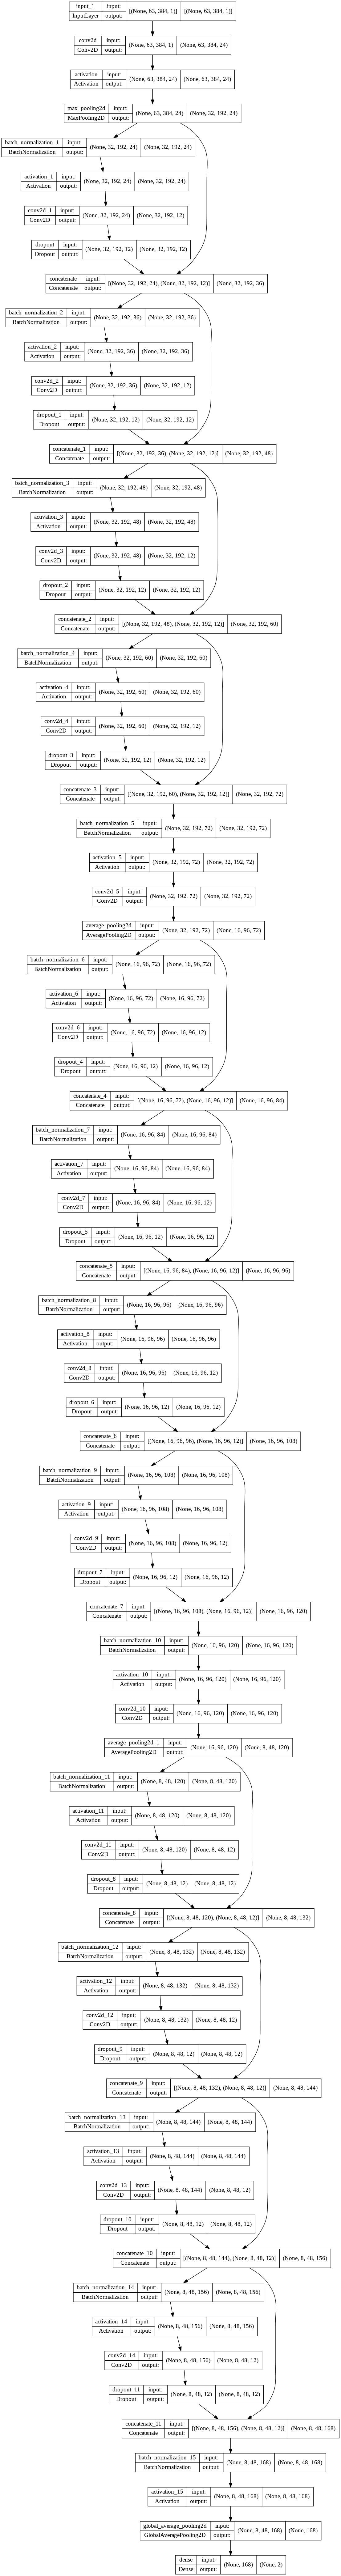

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_Dense, to_file='model_Dense.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
ypred = model_Dense.predict(x_test)
print("DenseNet Model")

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))
print(classification_report(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))


In [ ]:
print("DenseNet Model") 
plt.figure(1, figsize = (15,8)) 
   
plt.subplot(221)  
plt.plot(hist2.history['accuracy'])  
plt.plot(hist2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(hist2.history['loss'])  
plt.plot(hist2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
model_Dense.save('my_model_Dense.h5')

## **GoogleNet Model**

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, add
from tensorflow.keras.layers import InputLayer, Input, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, Activation, MaxPool2D, ZeroPadding2D, SeparableConv2D

from tensorflow.keras.models import Model, Sequential
from keras import regularizers

kernel_regularizer = regularizers.l2(0.0001)

final_activation = 'softmax'
entropy = 'sparse_categorical_crossentropy'
n_classes = 2
print('> {} classes'.format(n_classes))

In [ ]:
def FCLayers(baseModel):
    baseModel.trainable = True
    headModel = baseModel.output
    headModel = Dropout(0.5, seed=73)(headModel)
    headModel = Dense(n_classes, activation=final_activation)(headModel)
    model = Model(inputs = baseModel.input, outputs = headModel)
    return model

In [ ]:
from keras.layers.merge import concatenate

def Inception_block(input_layer, f1, f2, f3, f4):    
    
    path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
    
    path2 = Conv2D(filters = f2[0], kernel_size = (1,1), 
                   padding = 'same', activation = 'relu')(input_layer)
    
    path2 = Conv2D(filters = f2[1], kernel_size = (3,3), 
                   padding = 'same', activation = 'relu')(path2)

    path3 = Conv2D(filters = f3[0], kernel_size = (1,1), 
                   padding = 'same', activation = 'relu')(input_layer)
    
    path3 = Conv2D(filters = f3[1], kernel_size = (5,5), 
                   padding = 'same', activation = 'relu')(path3)

    path4 = MaxPooling2D((3,3), strides= (1,1), 
                         padding = 'same')(input_layer)
    
    path4 = Conv2D(filters = f4, kernel_size = (1,1), 
                   padding = 'same', activation = 'relu')(path4)
    
    output_layer = concatenate([path1, path2, path3, path4], axis = -1)

    return output_layer

In [ ]:
def layer_4(X):
    X = Inception_block(X, 192, (96, 208) , (16, 48), 64)
    X = Inception_block(X, 160, (112, 224), (24, 64), 64)
    X = Inception_block(X, 128, (128, 256), (24, 64), 64)
    X = Inception_block(X, 112, (144, 288), (32, 64), 64)  
    X = Inception_block(X, 256, (160, 320), (32, 128), 128)
    X = MaxPooling2D(pool_size = 3, strides = 2)(X)
    
    return X, X1, X2


def layer_3(X):
    X = Inception_block(X, 64, (96, 128), (16, 32), 32)
    X = Inception_block(X, 128, (128, 192), (32, 96), 64)
    X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)
    
    return X

def layer_2(X):
    X = Conv2D(filters = 64, 
               kernel_size = 1, 
               strides = 1, 
               padding = 'same', 
               activation = 'relu')(X)
    
    X = Conv2D(filters = 192, 
               kernel_size = 3, 
               padding = 'same', 
               activation = 'relu')(X)
    
    X = MaxPooling2D(pool_size= 3, strides = 2)(X)
    
    return X

In [ ]:
def load_GoogLeNet():
    input_layer = Input(shape = (63,384,1))
    
    X = Conv2D(64, kernel_size = 7, strides = 2, 
               padding = 'valid', activation = 'relu')(input_layer)
    
    X = MaxPooling2D(pool_size = 3, strides = 2)(X)
    
    X = layer_2(X)
    X = layer_3(X)
    X = layer_4(X)

    X = Inception_block(X, 256, (160, 320), (32, 128), 128)
    X = Inception_block(X, 384, (192, 384), (48, 128), 128)
    
    X = GlobalAveragePooling2D()(X)
    X = Dropout(0.6)(X)
    output = Dense(units = 2, activation ='softmax')(X)
  
    model = Model(input_layer,output, name = 'GoogLeNet')

    return model

load_GoogLeNet().summary()

In [ ]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau
          
EPOCHS = 50
patience = 3

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8
        
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr
        
def getCallbacks(name):



            


    lr_plat = ReduceLROnPlateau(patience = 2, mode = 'min')

    lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=False)

    early_stopping = EarlyStopping(patience = patience,
                                 mode='min', restore_best_weights=True, 
                                 verbose = 1, min_delta = .00075)


    checkpoint_filepath = name + '_Weights.h5'

    model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        mode='min',
                                        verbose = 1,
                                        save_best_only=True)

    import datetime
    log_dir="logs/fit/" + '_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")  
    tensorboard_callback = TensorBoard(log_dir = log_dir, write_graph=True, histogram_freq=1)

    return [ 
             lr_callback, 
             model_checkpoints,
             early_stopping,
             #tensorboard_callback,

            ]

GoogLeNet_callbacks = getCallbacks('GoogLeNet')


In [ ]:
def CompileModel(name, model):
    if name == 'GoogLeNet':
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def FitModel(model, name):
    history = model.fit(x_train,y_train, 
                        epochs=EPOCHS,
                        callbacks=GoogLeNet_callbacks,
                        validation_data = (x_val,y_val) )
    
    

    return model,history

In [ ]:
def BuildModel(name):
    if name == 'GoogLeNet':
        prepared_model = load_GoogLeNet() 
        
    compiled_model = CompileModel(name, prepared_model)
    return compiled_model

In [ ]:
g_compiled_model = BuildModel('GoogLeNet')
g_model,hist3= FitModel(g_compiled_model, 'GoogLeNet')


Epoch 1/50
427/427 [==============================] - ETA: 0s - loss: 0.5657 - accuracy: 0.7625
Epoch 1: val_loss improved from inf to 0.55047, saving model to GoogLeNet_Weights.h5
427/427 [==============================] - 98s 225ms/step - loss: 0.5657 - accuracy: 0.7625 - val_loss: 0.5505 - val_accuracy: 0.7644 - lr: 1.0000e-05
Epoch 2/50
427/427 [==============================] - ETA: 0s - loss: 0.5413 - accuracy: 0.7757
Epoch 2: val_loss improved from 0.55047 to 0.54708, saving model to GoogLeNet_Weights.h5
427/427 [==============================] - 94s 221ms/step - loss: 0.5413 - accuracy: 0.7757 - val_loss: 0.5471 - val_accuracy: 0.7644 - lr: 1.8000e-05
Epoch 3/50
427/427 [==============================] - ETA: 0s - loss: 0.5349 - accuracy: 0.7755
Epoch 3: val_loss improved from 0.54708 to 0.54473, saving model to GoogLeNet_Weights.h5
427/427 [==============================] - 95s 221ms/step - loss: 0.5349 - accuracy: 0.7755 - val_loss: 0.5447 - val_accuracy: 0.7644 - lr: 2.6000e

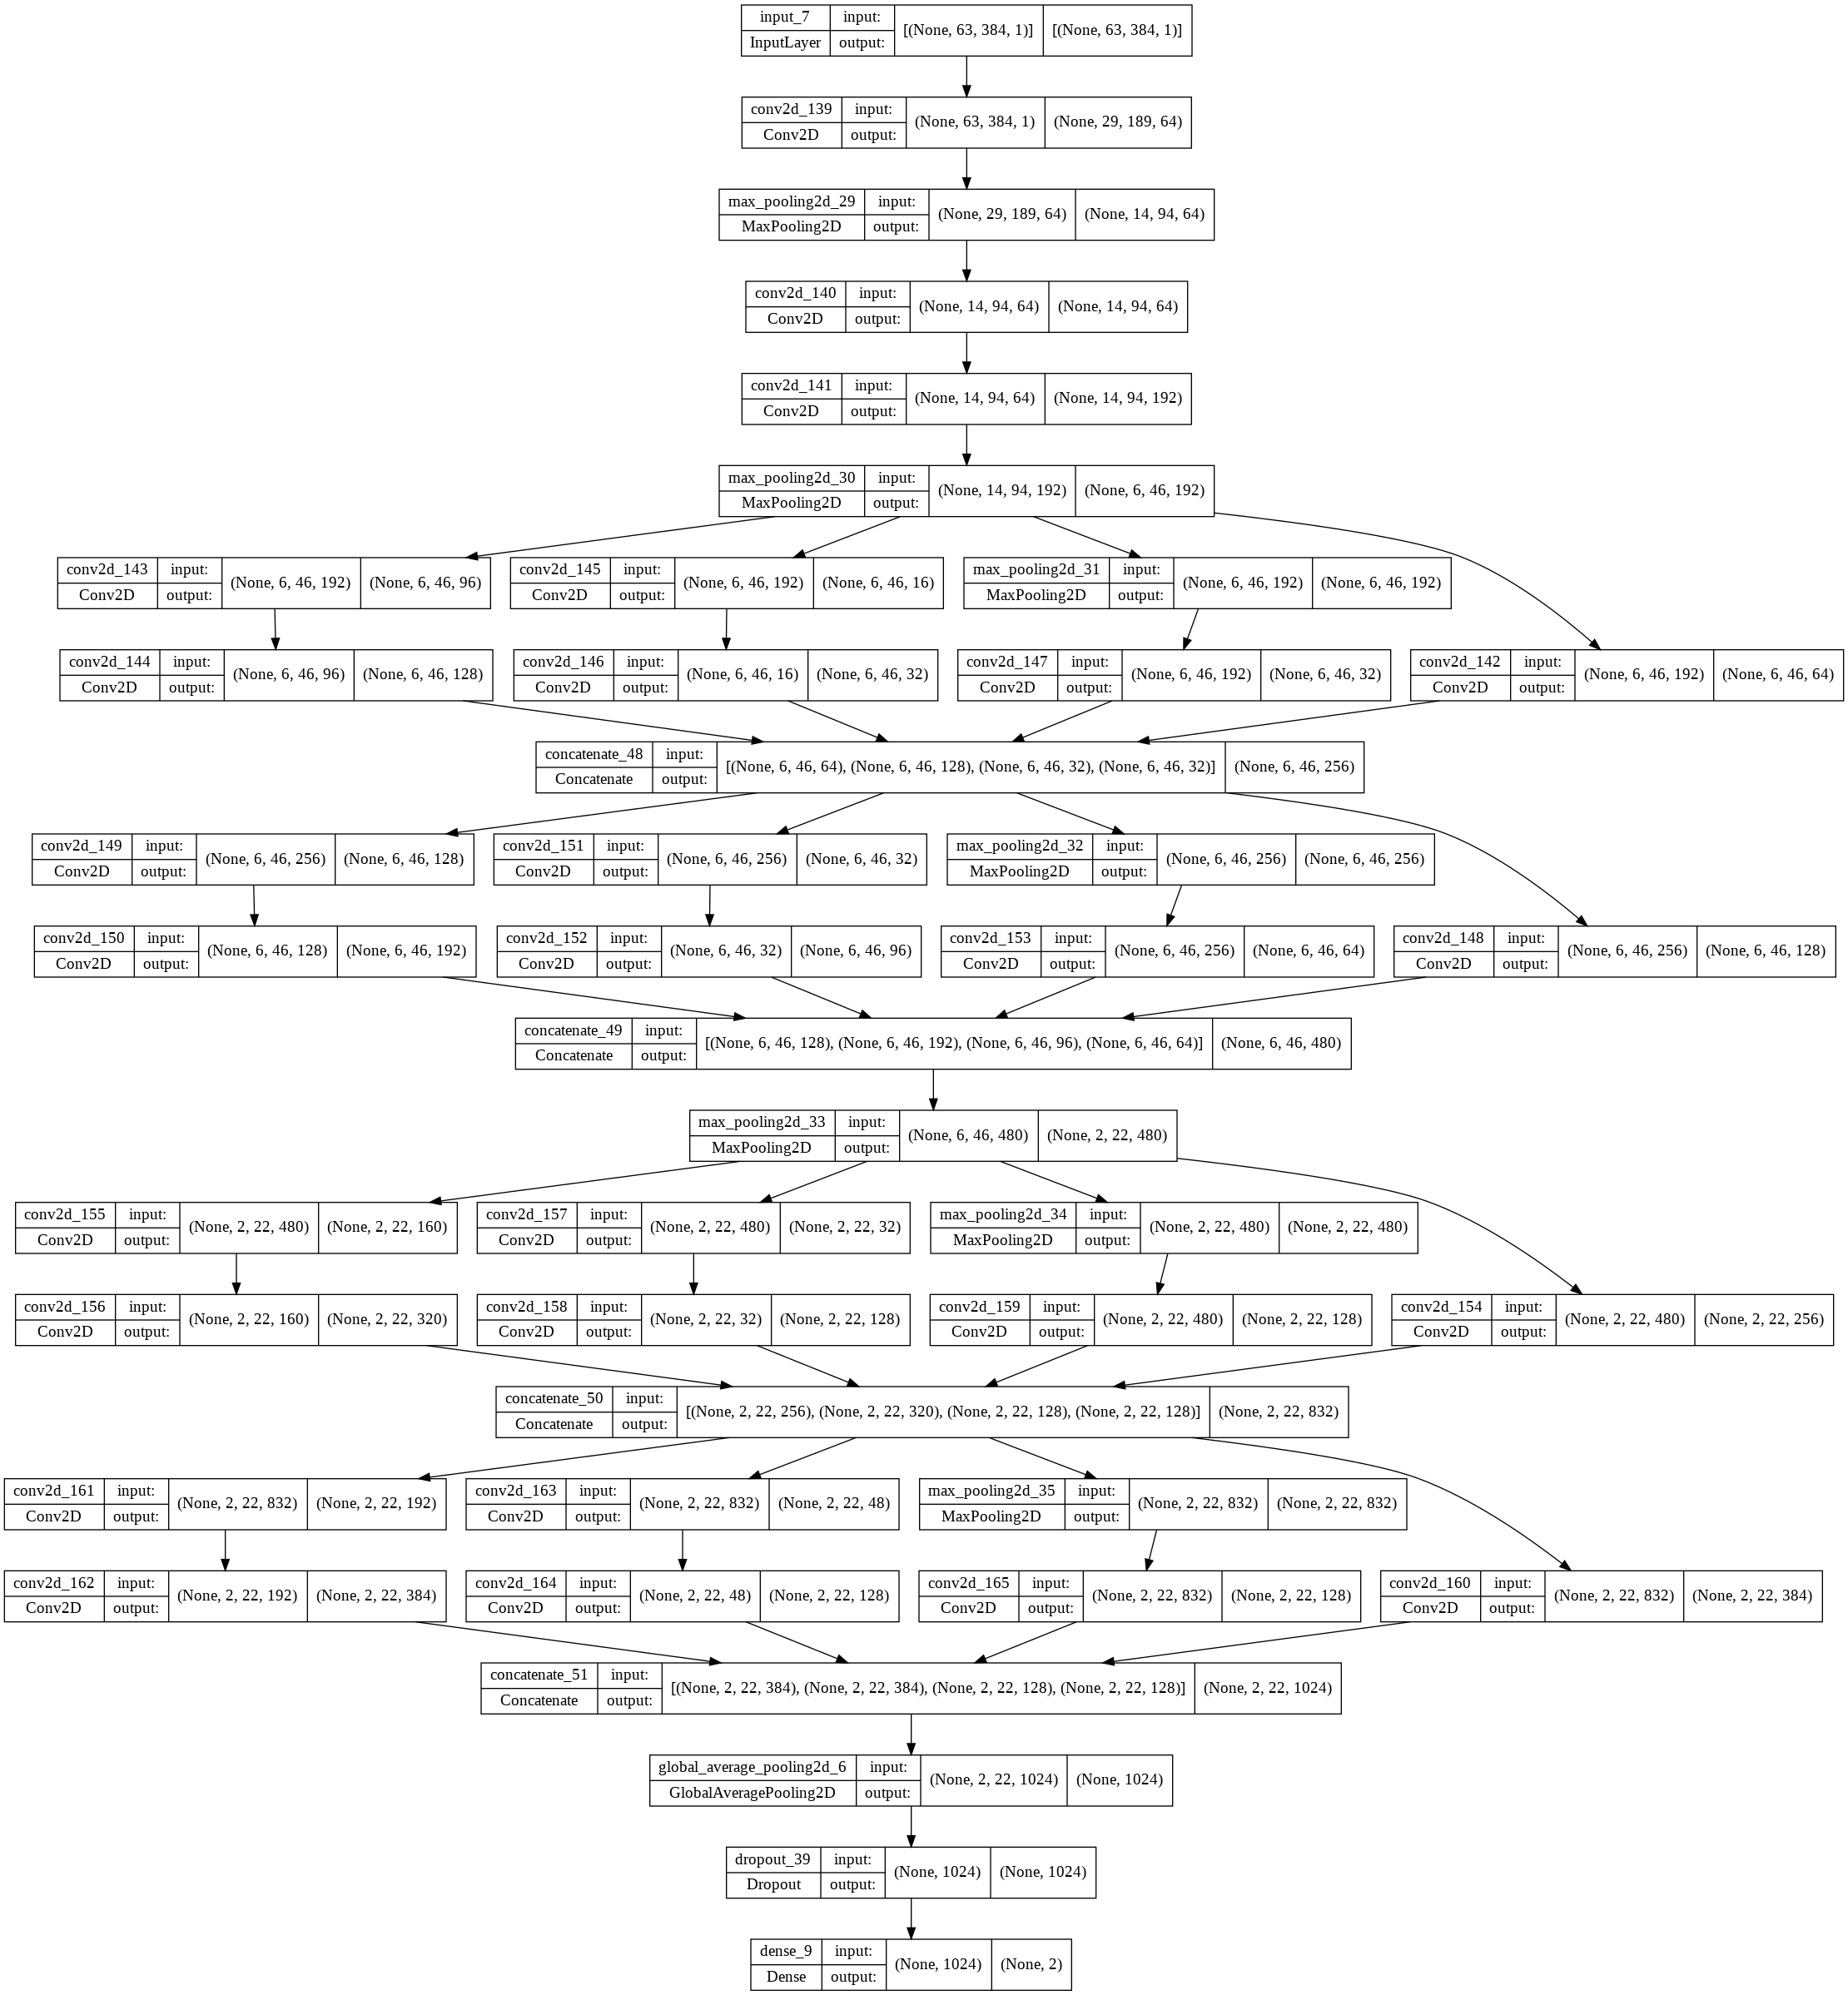

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(g_model, to_file='model_GoogleNet.png', show_shapes=True, show_layer_names=True)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
ypred = g_model.predict(x_test)
print("GoogleNet Model") 
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))
print(classification_report(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))


GoogleNet Model
[[1264   61]
 [ 292   50]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1325
           1       0.45      0.15      0.22       342

    accuracy                           0.79      1667
   macro avg       0.63      0.55      0.55      1667
weighted avg       0.74      0.79      0.74      1667



GoogleNet Model


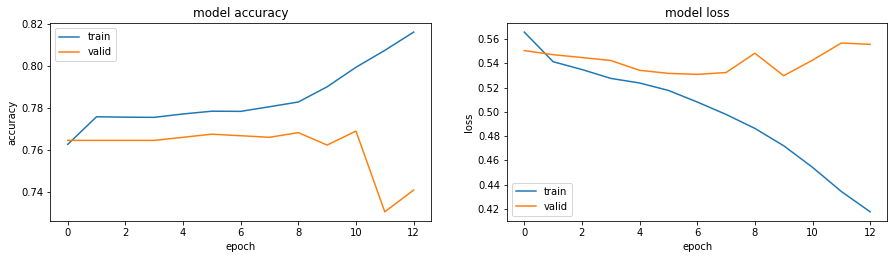

In [ ]:
plt.figure(1, figsize = (15,8)) 
print("GoogleNet Model")     
plt.subplot(221)  
plt.plot(hist3.history['accuracy'])  
plt.plot(hist3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(hist3.history['loss'])  
plt.plot(hist3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
g_model.save('my_model_GoogleNet.h5')

## **ResNet50 Model**



In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
from keras.layers import Dropout
input = Input(shape =(63,384,1))

X = ZeroPadding2D((3, 3))(input)


X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides=(2, 2))(X)

X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
X = identity_block(X, 3, [512, 512, 2048], stage=5, block='d')
X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
# Fully connected layers  
X = Flatten()(X) 
X = Dense(units = 1000, activation ='relu')(X)
X = Dense(units = 128, activation ='relu')(X) 
X = Dropout(0.5)(X) 
output = Dense(units = 2, activation ='softmax')(X)


# creating the model

model2 = Model (inputs=input, outputs =output, name='ResNet50')
model2.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 63, 384, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 69, 390, 1)  0           ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 32, 192, 64)  3200        ['zero_padding2d_1[0][0]']       
                                                                                           

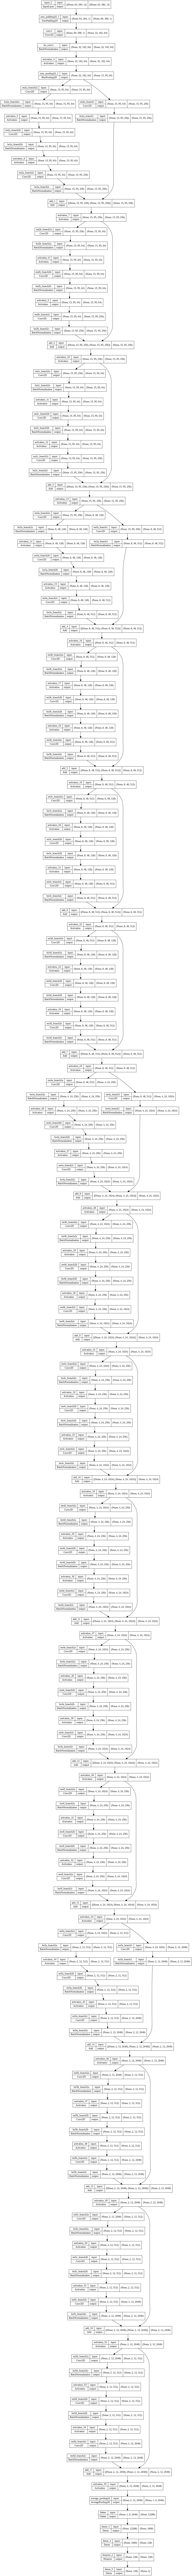

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_Resnet50.png', show_shapes=True, show_layer_names=True)

In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
fit_history=model2.fit(x_train, y_train, epochs=17, validation_data=(x_val, y_val), verbose=1, batch_size=32 )

Epoch 1/17
427/427 [==============================] - 745s 2s/step - loss: 0.5775 - accuracy: 0.7749 - val_loss: 0.5870 - val_accuracy: 0.7644
Epoch 2/17
427/427 [==============================] - 765s 2s/step - loss: 0.5435 - accuracy: 0.7758 - val_loss: 0.5462 - val_accuracy: 0.7644
Epoch 3/17
427/427 [==============================] - 569s 1s/step - loss: 0.5309 - accuracy: 0.7758 - val_loss: 0.5368 - val_accuracy: 0.7644
Epoch 4/17
427/427 [==============================] - 491s 1s/step - loss: 0.5285 - accuracy: 0.7758 - val_loss: 0.5374 - val_accuracy: 0.7644
Epoch 5/17
427/427 [==============================] - 491s 1s/step - loss: 0.5242 - accuracy: 0.7758 - val_loss: 0.5405 - val_accuracy: 0.7644
Epoch 6/17
427/427 [==============================] - 525s 1s/step - loss: 0.5238 - accuracy: 0.7758 - val_loss: 0.5375 - val_accuracy: 0.7644
Epoch 7/17
427/427 [==============================] - 643s 2s/step - loss: 0.5230 - accuracy: 0.7757 - val_loss: 0.5303 - val_accuracy: 0.7644

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
ypred = model2.predict(x_test)

print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))
print(classification_report(np.argmax(y_test, axis=1), np.argmax(ypred, axis=1)))

[[1312   13]
 [ 300   42]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1325
           1       0.76      0.12      0.21       342

    accuracy                           0.81      1667
   macro avg       0.79      0.56      0.55      1667
weighted avg       0.80      0.81      0.75      1667



In [ ]:
print(fit_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


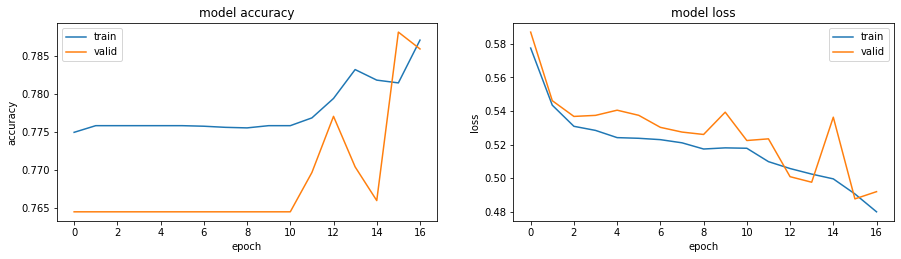

In [ ]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [ ]:
model2.save('my_modelFinal.h5')

In [ ]:
EEG_data[y_train_test].value_counts(normalize=True)

In [ ]:
model=load_model('my_modelFinal.h5')


In [ ]:
model=load_model('./drive/MyDrive/TestPFE/my_modelFinal.h5')

(63, 384)


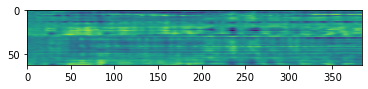

In [ ]:
file_test = pd.read_csv('test_data10.csv')
print(file_test.shape)
plt.imshow(file_test)
plt.imsave('test.png',file_test )
file_test = file_test.values.reshape(1,63,384, 1)
predi=model.predict(file_test)

In [ ]:
print(predi)

[[0.7482261  0.25177395]]


In [ ]:
import joblib
joblib.dump(model2, 'model6.joblib')

In [ ]:
import pickle
# save the model to disk
filename = 'model6_pickle.sav'
pickle.dump(model2, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))